In [1]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=d414d36a33dd20e14baa04ea4d6d7b4122b52e89e5013836c5dfd7d6d6de82b5
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Define path to the data directory
data_dir = Path('../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/')

data_dir

PosixPath('../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database')

In [4]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / 'Normal'
Tuberculosis_cases_dir = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
1,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
2,../input/tuberculosis-tb-chest-xray-dataset/TB...,1
3,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
4,../input/tuberculosis-tb-chest-xray-dataset/TB...,1


0    3500
1     700
Name: label, dtype: int64


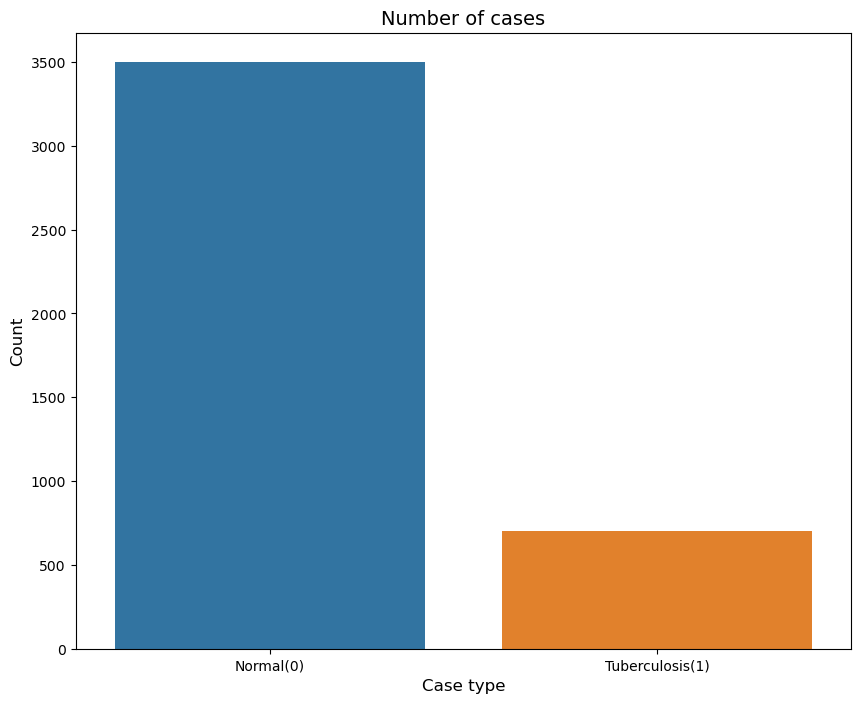

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [6]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Total number of validation examples:  (4200, 150, 150, 3)
Total number of labels: (4200,)


In [7]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [8]:
train_data1.shape

(4200, 150, 150, 3)

In [9]:
train_labels1.shape

(4200, 1)

In [10]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1])

In [11]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
print(train_data1.shape)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

(4200, 67500)


0    3500
1    3500
Name: label, dtype: int64


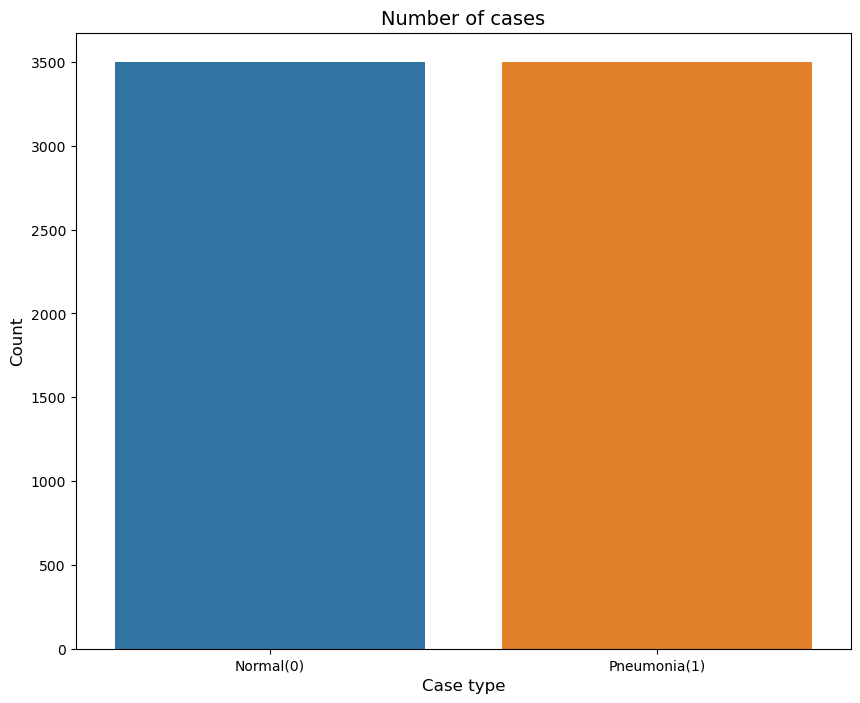

In [12]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [15]:
train_data2 =train_data2.reshape(-1,100,100,3)

In [16]:
train_data2.shape

(15750, 100, 100, 3)

In [17]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [19]:
type(train_data2)

numpy.ndarray

In [20]:
batch_size = 32

train_data2 = np.array(train_data2)
train_labels2 = np.array(train_labels2)

train_data2 = torch.tensor(train_data2.reshape(-1, 3, 150, 150), dtype=torch.float)
train_labels2 = torch.tensor(train_labels2, dtype=torch.long)

# Create a new dataset with the oversampled data
oversampled_dataset = torch.utils.data.TensorDataset(train_data2, train_labels2)

all_ds = oversampled_dataset

total_size = len(all_ds)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_ds, rest_ds = random_split(all_ds, [train_size, total_size - train_size])
val_ds, test_ds = random_split(rest_ds, [val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, num_workers=4)

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [21]:
class weighted_binary_crossentropy(nn.Module):
  def __init__(self):
      super(weighted_binary_crossentropy, self).__init__()

  def forward(self ,y_true, y_pred, epsilon=1e-7):

    loss_pos = torch.multiply(torch.tensor([-1]).to(device) , y_true * torch.log(y_pred + epsilon))
    loss_neg = torch.multiply(torch.tensor([-1]).to(device) , (1 - y_true) * torch.log(1 - y_pred + epsilon))

    return torch.mean(loss_pos + loss_neg)

In [158]:
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self, img_width, img_height):
        super(MyModel, self).__init__()
        input_shape = (3, img_width, img_height)

        self.model = torchvision.models.efficientnet_b7(weights = 'EfficientNet_B7_Weights.IMAGENET1K_V1')

        for param in self.model.parameters():
            param.requires_grad = False

        dense_out_features = torchvision.models.efficientnet_b7(weights = 'EfficientNet_B7_Weights.IMAGENET1K_V1').classifier[1].out_features  # Get the output features of the dense net
        self.layer256 = nn.Linear(dense_out_features, 256)
        self.relu = nn.ReLU()
        self.pReLU = nn.PReLU()
        self.m = nn.BatchNorm1d(256)
        self.layer32 = nn.Linear(256, 64)
        self.layer8 = nn.Linear(32, 8)
        self.layer1 = nn.Linear(64, 1)
        self.out = nn.Linear(256, 1)

        self.Sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.layer256(x)
        x = self.pReLU(x)
        #x = self.layer32(x)
        #x = self.pReLU(x)
        #x = self.layer8(x)
        #x = self.pReLU(x)
        x = self.out(x)
        x = self.Sigmoid(x)
        return x


In [23]:
train_loader

In [204]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from efficientnet_pytorch import EfficientNet

model = MyModel(150, 150).to(device)

Loss = weighted_binary_crossentropy()

optimizer_conv = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30

for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_preds = 0
    total_preds = 0
    for i, (inputs, labels) in enumerate(train_loader):

        # Move the batch tensor to the device (e.g., GPU)
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer_conv.zero_grad()

        outputs = model(inputs)

        loss = Loss(outputs, labels)

        loss.backward()

        optimizer_conv.step()

        epoch_loss += loss.item()

        predicted = (outputs >= 0.5).float()  # Threshold the outputs

        #correct_preds += (predicted == labels).sum().item()  # Accumulate correct predictions

        for i in range(labels.size(0)):
          if predicted[i] == labels[i] :
            correct_preds += 1

        total_preds += labels.size(0)  # Accumulate total predictions

    # Calculate accuracy for the epoch
    accuracy = correct_preds / total_preds
    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/30, Average Loss: 2.2674, Accuracy: 0.8759
Epoch 2/30, Average Loss: 1.7887, Accuracy: 0.8922
Epoch 3/30, Average Loss: 1.5087, Accuracy: 0.9104
Epoch 4/30, Average Loss: 1.5804, Accuracy: 0.9016
Epoch 5/30, Average Loss: 1.3942, Accuracy: 0.9149
Epoch 6/30, Average Loss: 1.3016, Accuracy: 0.9198
Epoch 7/30, Average Loss: 1.2037, Accuracy: 0.9282
Epoch 8/30, Average Loss: 1.1905, Accuracy: 0.9278
Epoch 9/30, Average Loss: 1.0185, Accuracy: 0.9386
Epoch 10/30, Average Loss: 1.0271, Accuracy: 0.9382
Epoch 11/30, Average Loss: 1.0843, Accuracy: 0.9351
Epoch 12/30, Average Loss: 0.9369, Accuracy: 0.9437
Epoch 13/30, Average Loss: 0.8761, Accuracy: 0.9459
Epoch 14/30, Average Loss: 0.7856, Accuracy: 0.9537
Epoch 15/30, Average Loss: 0.8614, Accuracy: 0.9473
Epoch 16/30, Average Loss: 0.8261, Accuracy: 0.9508
Epoch 17/30, Average Loss: 0.7984, Accuracy: 0.9531
Epoch 18/30, Average Loss: 0.7986, Accuracy: 0.9512
Epoch 19/30, Average Loss: 0.7683, Accuracy: 0.9533
Epoch 20/30, Average 

In [206]:
def predict():
    correct_preds = 0
    total_preds = 0
    tens_label = torch.tensor([]).to(device)  # Move tens tensor to the same device as inputs and labels
    tens_input = torch.tensor([]).to(device)  # Move tens tensor to the same device as inputs and labels

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            tens_label = torch.cat((labels, tens_label), 0)
            
            outputs = model(inputs)

            predicted = (outputs >= 0.5).float()  
            
            tens_input = torch.cat((predicted, tens_input), 0)
            
            for i in range(labels.size(0)):
                if predicted[i] == labels[i] :
                    correct_preds += 1

            total_preds += labels.size(0) 

    accuracy = correct_preds / total_preds
        
    return accuracy ,tens_input ,tens_label


In [207]:
ac ,inp ,lb = predict()

In [208]:
if torch.all(lb == inp) : 
    print("yees")
else:
    print("no")

no


In [209]:
inp = inp.cpu().numpy()
lb = lb.cpu().numpy()

In [210]:
ac

0.9552380952380952

In [197]:
len(inp)

1050

In [140]:
len(lb)

1050

In [211]:
from sklearn.metrics import accuracy_score

total_right = accuracy_score(lb, inp, normalize=False)
print(total_right)
accuracy = (total_right / len(lb))
print(accuracy)

1003
0.9552380952380952


In [212]:
from sklearn.metrics import classification_report

print(classification_report(lb, inp))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       539
         1.0       0.97      0.94      0.95       511

    accuracy                           0.96      1050
   macro avg       0.96      0.95      0.96      1050
weighted avg       0.96      0.96      0.96      1050



In [213]:
from sklearn.metrics import confusion_matrix

confusion_matrix(lb, inp)

array([[522,  17],
       [ 30, 481]])